# Data 102 Final Project - Effect of Endorsements on Candidate Advancement

By Ryan Shah, Aishwarya Rane, Tanvee Joshi, and Aruna Sudarshan

## I. Data Cleaning & Uploading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install statsmodels
import statsmodels.api as sm
import random
import itertools
import hashlib

from statsmodels.stats.proportion import proportions_ztest

In [9]:
# https://github.com/fivethirtyeight/data/tree/master/primary-candidates-2018

dem = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/dem_candidates.csv", encoding='latin-1')
rep = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/primary-candidates-2018/rep_candidates.csv", encoding='latin-1')

# Remove "On the Ballot," as it is irrelevant to our analysis
dem = dem[dem['Primary Status']!='On the Ballot']
rep = rep[rep['Primary Status']!='On the Ballot']

## II. Exploratory Data Analysis

### a. Investigating Gun Sense and NRA Endorsements

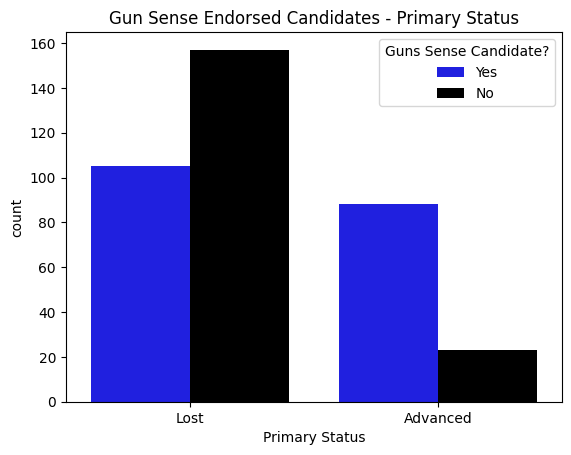

In [10]:
sns.countplot(data=dem, x="Primary Status", hue="Guns Sense Candidate?", hue_order=["Yes", "No"], \
palette=["blue", "black"]).set(title="Gun Sense Endorsed Candidates - Primary Status");

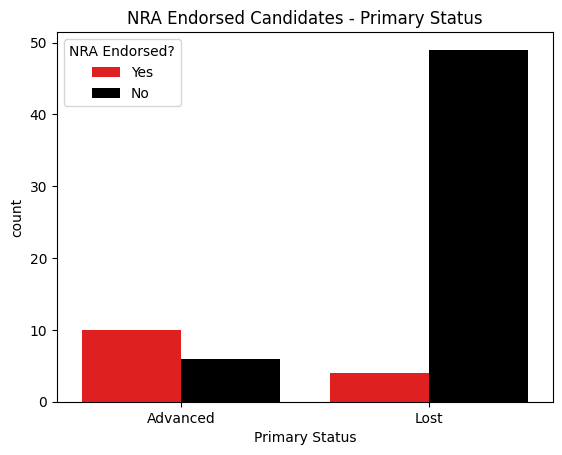

In [11]:
sns.countplot(data=rep, x="Primary Status", hue="NRA Endorsed?", hue_order=["Yes", "No"], \
palette=["red", "black"]).set(title="NRA Endorsed Candidates - Primary Status");

Authors' Note: Note that there are significantly more candidates who advanced who were endorsed by Gun Sense than those who weren't. Of the candidates who lost, a majority of them were not endorsed by Gun Sense.

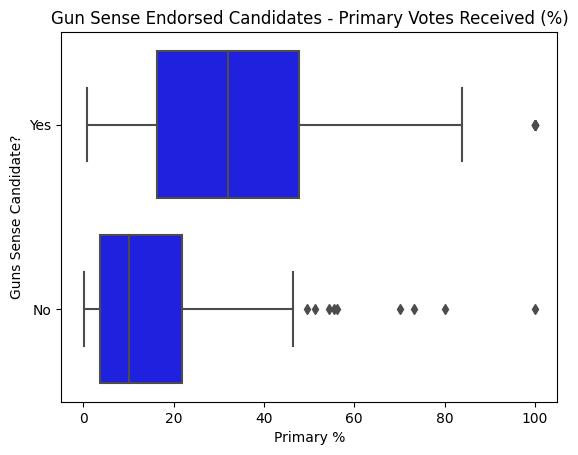

In [12]:
sns.boxplot(data=dem, x="Primary %", y="Guns Sense Candidate?", order=["Yes", "No"], color="blue")\
.set(title="Gun Sense Endorsed Candidates - Primary Votes Received (%)");


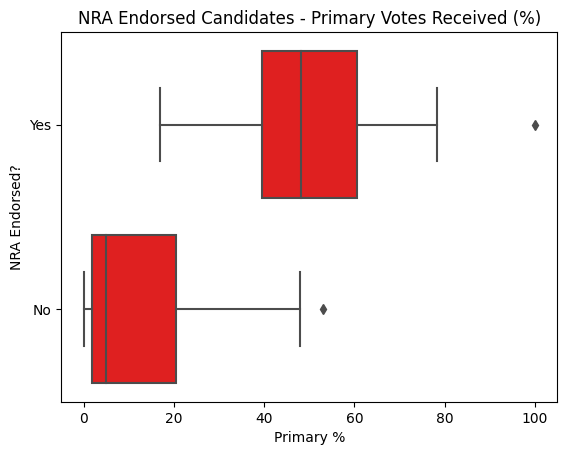

In [13]:
sns.boxplot(data=rep, x="Primary %", y="NRA Endorsed?", hue_order=["Yes", "No"], color="red")\
.set(title="NRA Endorsed Candidates - Primary Votes Received (%)");

Authors' Note: Interestingly, we can observe that NRA endorsed candidates seemed to capture a higher % of the votes in the Primary compared to non-NRA endorsed candidates. The mean Primary % for NRA endorsed candidates is approximately 45%, while the mean Primary % for non-NRA endorsed candidates is approximately 5%, representing a large difference between the two. Additionally, we can observe that Gun Sense endorsed candidates seemed to capture a higher % of the votes in the Primary compared to non-Gun Sense endorsed candidates. The mean Primary % for Gun Sense endorsed candidates is approximately 30%, while the mean Primary % for non-Gun Sense endorsed candidates is approximately 10%, representing a large difference between the two.

### b. Investigating Emily's List and Right to Life Endorsements

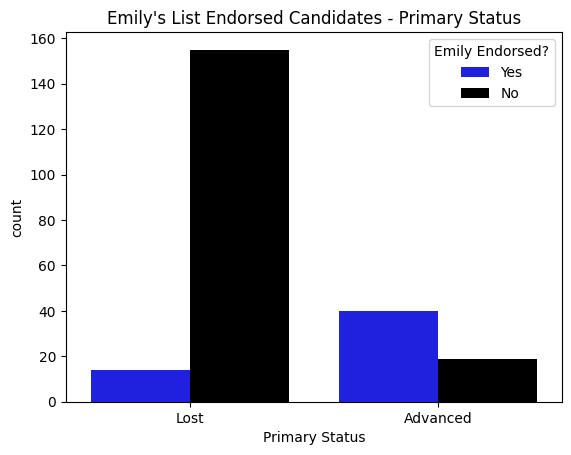

In [14]:
sns.countplot(data=dem, x="Primary Status", hue="Emily Endorsed?", hue_order=["Yes", "No"], \
palette=["blue", "black"]).set(title="Emily's List Endorsed Candidates - Primary Status");

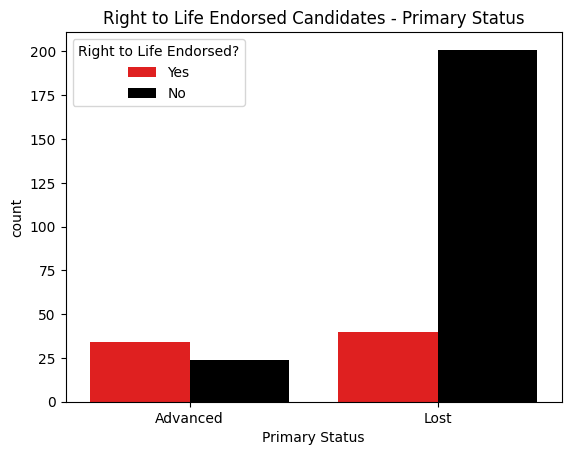

In [15]:
sns.countplot(data=rep, x="Primary Status", hue="Right to Life Endorsed?", hue_order=["Yes", "No"], \
palette=["red", "black"]).set(title="Right to Life Endorsed Candidates - Primary Status");

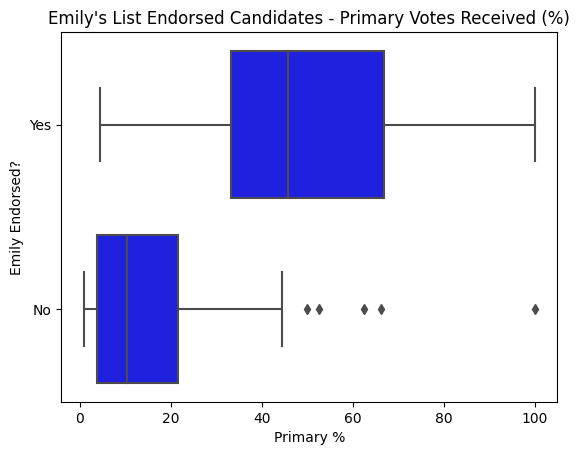

In [16]:
sns.boxplot(data=dem, x="Primary %", y="Emily Endorsed?", order=["Yes", "No"], color='blue')\
.set(title = "Emily's List Endorsed Candidates - Primary Votes Received (%)");

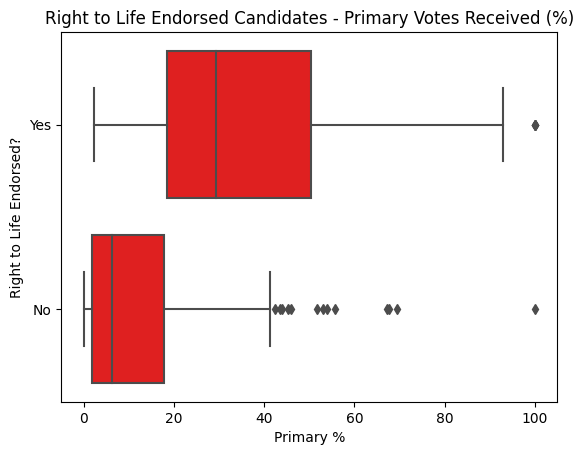

In [17]:
sns.boxplot(data=rep, x="Primary %", y="Right to Life Endorsed?", order=["Yes", "No"], color='red')\
.set(title = "Right to Life Endorsed Candidates - Primary Votes Received (%)");

Authors' Note: We can note, here, that Right to Life endorsed candidates seemed to capture a higher % of the votes in the Primary compared to non-Right-to-Life endorsed candidates. The mean Primary % for Right to Life endorsed candidates is approximately 30%, while the mean Primary % for non-Right to Life endorsed candidates is approximately 5%, representing a large difference between the two. Additionally, we can observe that Emily's List endorsed candidates seemed to capture a higher % of the votes in the Primary compared to non-Emily's List endorsed candidates. The mean Primary % for NRA endorsed candidates is approximately 45%, while the mean Primary % for non-NRA endorsed candidates is approximately 10%, representing a large difference between the two.

### c. Investigating Party Support

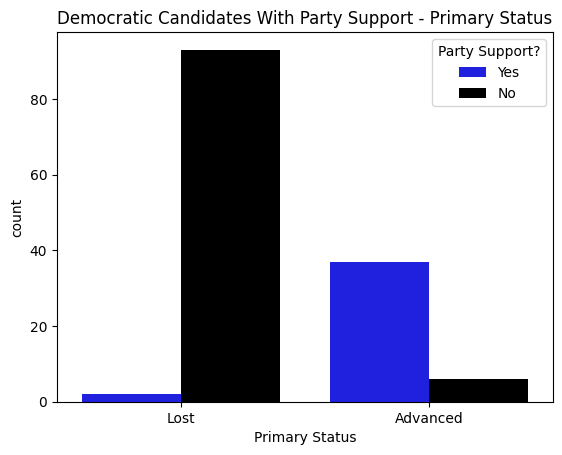

In [18]:
sns.countplot(data=dem, x="Primary Status", hue="Party Support?", hue_order=["Yes", "No"], \
palette=["blue", "black"]).set(title="Democratic Candidates With Party Support - Primary Status");

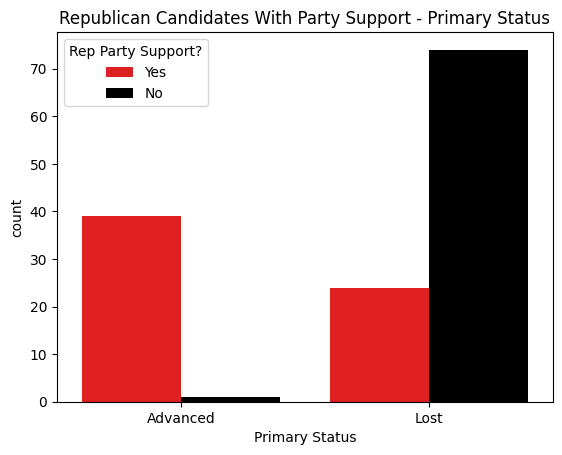

In [19]:
sns.countplot(data=rep, x="Primary Status", hue="Rep Party Support?", hue_order=["Yes", "No"], \
palette=["red", "black"]).set(title="Republican Candidates With Party Support - Primary Status");

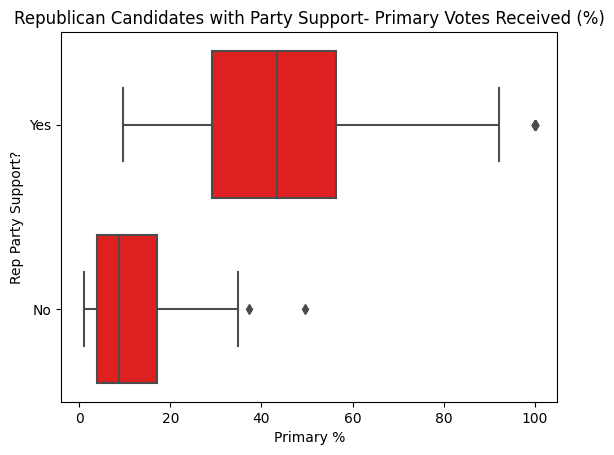

In [20]:
sns.boxplot(data=rep, x="Primary %", y="Rep Party Support?", order=["Yes", "No"], color='red')\
.set(title="Republican Candidates with Party Support- Primary Votes Received (%)");

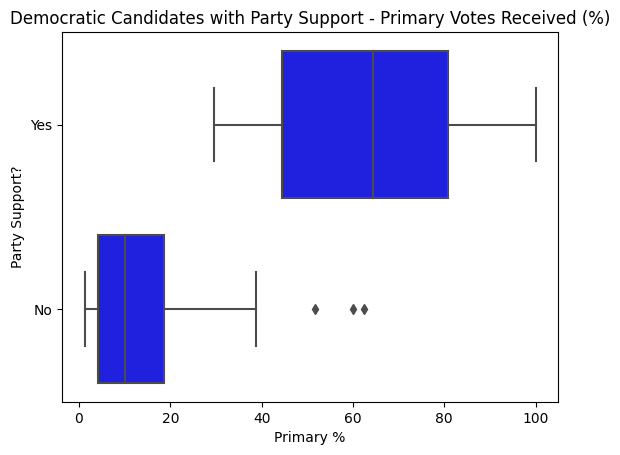

In [21]:
sns.boxplot(data=dem, x="Primary %", y="Party Support?", order=["Yes", "No"], color = 'blue')\
.set(title="Democratic Candidates with Party Support - Primary Votes Received (%)");

Authors' Note: We can note, here, that candidates in both the Democratic and Republican parties, who have party support, perform a lot better in the primaries than candidates in their party who do not have party endorsement. The mean Primary % for Democratic Party endorsed candidates is approximately 65%, while the mean Primary % for non-Democratic Party endorsed candidates is approximately 10%, representing a large difference between the two. The mean Primary % for Republican Party endorsed candidates is approximately 45%, while the mean Primary % for non-Republican Party endorsed candidates is approximately 10%, representing a large difference between the two. The differences in outcomes between candidates endorsed by their party and those who weren't also appears to be, on average, higher than the differences observed in previous exploratory analysis for Gun-Issue and Abortion-Issue Organizations

The trends we have observed above are integral to preliminary hypotheses as to what endorsements may be important to a candidate's success. However, we need to determine which endorsements are statistically significant, which we will delve more deeply into in the next section of analysis.

## III. Casual Inference

### a. Data Cleaning

In [22]:
# Binarizing column values (Democratic)
dem_cleaned = dem.copy()
rep_cleaned = rep.copy()

dem_cleaned["Primary Status"] = pd.get_dummies(dem_cleaned["Primary Status"])["Advanced"]
dem_cleaned["Party Support?"] = pd.get_dummies(dem_cleaned["Party Support?"])["Yes"]

#Endorsements
dem_cleaned["Emily Endorsed?"] = pd.get_dummies(dem_cleaned["Emily Endorsed?"])["Yes"]
dem_cleaned["Guns Sense Candidate?"] = pd.get_dummies(dem_cleaned["Guns Sense Candidate?"])["Yes"]
dem_cleaned["Our Revolution Endorsed?"] = pd.get_dummies(dem_cleaned["Our Revolution Endorsed?"])["Yes"]
dem_cleaned["Biden Endorsed?"] = pd.get_dummies(dem_cleaned["Biden Endorsed?"])["Yes"]

#Identity
dem_cleaned["Race"] = pd.get_dummies(dem_cleaned["Race"])["White"]
dem_cleaned["LGBTQ?"] = pd.get_dummies(dem_cleaned["LGBTQ?"])["Yes"]
dem_cleaned["Veteran?"] = pd.get_dummies(dem_cleaned["Veteran?"])["Yes"]
dem_cleaned["Self-Funder?"] = pd.get_dummies(dem_cleaned["Self-Funder?"])["Yes"]
dem_cleaned["Elected Official?"] = pd.get_dummies(dem_cleaned["Elected Official?"])["Yes"]
dem_cleaned["STEM?"] = pd.get_dummies(dem_cleaned["STEM?"])["Yes"]

# Binarizing column values (Republican)
rep_cleaned["Primary Status"] = pd.get_dummies(rep_cleaned["Primary Status"])["Advanced"]
rep_cleaned["Rep Party Support?"] = pd.get_dummies(rep_cleaned["Rep Party Support?"])["Yes"]
rep_cleaned["Right to Life Endorsed?"] = pd.get_dummies(rep_cleaned["Right to Life Endorsed?"])["Yes"]
rep_cleaned["NRA Endorsed?"] = pd.get_dummies(rep_cleaned["NRA Endorsed?"])["Yes"]
rep_cleaned["Trump Endorsed?"] = pd.get_dummies(rep_cleaned["Trump Endorsed?"])["Yes"]
rep_cleaned["Club for Growth Endorsed?"] = pd.get_dummies(rep_cleaned["Club for Growth Endorsed?"])["Yes"]

# One hot encoding for state (dem df)
one_hot_encoded_state = pd.get_dummies(dem_cleaned["State"])
dem_cleaned_joined = pd.concat([dem_cleaned, one_hot_encoded_state], axis=1, join="inner")

# One hot encoding for state (rep df)
one_hot_encoded_state = pd.get_dummies(rep_cleaned["State"])
rep_cleaned_joined = pd.concat([rep_cleaned, one_hot_encoded_state], axis=1, join="inner")

###  b. OLS Model Function

In [23]:
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.

    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """

    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)

    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

### c. Fitted OLS Models

#### Model 1: Understanding the Effect of Party Support on Democratic Candidate Primary Status

In [24]:
dem_simple_gammas_model = fit_OLS_model(dem_cleaned, 'Primary Status', "Party Support?")
print(dem_simple_gammas_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Primary Status   R-squared (uncentered):                 -24.544
Model:                            OLS   Adj. R-squared (uncentered):            -24.576
Method:                 Least Squares   F-statistic:                             -778.3
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        1.00
Time:                        03:43:58   Log-Likelihood:                         -639.57
No. Observations:                 811   AIC:                                      1281.
Df Residuals:                     810   BIC:                                      1286.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Model 2: Understanding the Effect of Party Support on Republican Candidate Primary Status

In [25]:
rep_simple_gammas_model = fit_OLS_model(rep_cleaned, 'Primary Status', "Rep Party Support?")
print(rep_simple_gammas_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Primary Status   R-squared (uncentered):                    -inf
Model:                            OLS   Adj. R-squared (uncentered):               -inf
Method:                 Least Squares   F-statistic:                             -771.0
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        1.00
Time:                        03:44:00   Log-Likelihood:                         -631.12
No. Observations:                 772   AIC:                                      1264.
Df Residuals:                     771   BIC:                                      1269.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


#### Model 3: Understanding the Effect of Being From a Particular State on Democratic Candidate Primary Status

In [26]:
dem_confounding_gammas_model = fit_OLS_model(dem_cleaned_joined, 'Primary Status', ["Party Support?", 'ND', 'AZ',
                                                                                    'SD', 'MT', 'UT', 'OR', 'ID',
                                                                                    'WV', 'AR', 'WA', 'MS', 'NM',
                                                                                    'ME', 'NE', 'CO', 'KS', 'NJ',
                                                                                    'MO', 'AL', 'IA', 'KY', 'VA',
                                                                                    'NC', 'MD','TN', 'OK', 'SC',
                                                                                    'GA', 'IN', 'NV', 'MI', 'NY',
                                                                                    'IL', 'PA', 'OH', 'CA', 'TX'])
print(dem_confounding_gammas_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Primary Status   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     3.911
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           3.58e-13
Time:                        03:44:01   Log-Likelihood:                -467.18
No. Observations:                 811   AIC:                             1010.
Df Residuals:                     773   BIC:                             1189.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Party Support?     0.7197      0.075      9.

#### Model 4: Understanding the Effect of Being From a Particular State on Republican Candidate Primary Status

In [27]:
rep_confounding_gammas_model = fit_OLS_model(rep_cleaned_joined, 'Primary Status', ["Rep Party Support?", 'IA',
                                                                                    'UT', 'KY', 'MT', 'ME', 'SD',
                                                                                    'NC', 'DE', 'MS', 'ND', 'VT',
                                                                                    'WY','CO', 'KS', 'AK', 'RI',
                                                                                    'NM', 'VA', 'MA', 'GA', 'NH',
                                                                                    'WV', 'NY', 'SC','ID', 'HI',
                                                                                    'WI', 'CT', 'MI', 'OK', 'MO',
                                                                                    'NJ', 'IL', 'OR', 'MN', 'WA',
                                                                                    'TN', 'NV', 'IN', 'PA', 'AZ',
                                                                                    'MD', 'OH', 'FL', 'TX', 'CA'])
print(rep_confounding_gammas_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Primary Status   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.470
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           5.46e-07
Time:                        03:44:04   Log-Likelihood:                -457.64
No. Observations:                 772   AIC:                             1009.
Df Residuals:                     725   BIC:                             1228.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rep Party Support?     0.2813      0

#### Model 5: OLS Model for Democratic Endorsements Confounding Variables

In [28]:
dem_endorsements_gammas_model = fit_OLS_model(dem_cleaned, 'Primary Status', ["Party Support?",
"Emily Endorsed?", "Guns Sense Candidate?", "Our Revolution Endorsed?","Biden Endorsed?"])
print(dem_endorsements_gammas_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Primary Status   R-squared (uncentered):                 -20.038
Model:                            OLS   Adj. R-squared (uncentered):            -20.169
Method:                 Least Squares   F-statistic:                             -153.5
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        1.00
Time:                        03:44:06   Log-Likelihood:                         -560.88
No. Observations:                 811   AIC:                                      1132.
Df Residuals:                     806   BIC:                                      1155.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

#### Model 6: OLS Model for Democratic Endorsements Confounding Variables (Demographic)

In [29]:
dem_endorsements_gammas_model = fit_OLS_model(dem_cleaned, 'Primary Status', ["Party Support?","Race",
"LGBTQ?", "Veteran?", "Self-Funder?","Elected Official?", "STEM?"])
print(dem_endorsements_gammas_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Primary Status   R-squared (uncentered):                 -18.808
Model:                            OLS   Adj. R-squared (uncentered):            -18.981
Method:                 Least Squares   F-statistic:                             -109.1
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        1.00
Time:                        03:44:08   Log-Likelihood:                         -536.45
No. Observations:                 811   AIC:                                      1087.
Df Residuals:                     804   BIC:                                      1120.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

#### Model 7: OLS Model for Republican Endorsements Confounding Variables

In [30]:
rep_endorsements_gammas_model = fit_OLS_model(rep_cleaned, 'Primary Status', ["Rep Party Support?",
"Right to Life Endorsed?", "NRA Endorsed?", "Trump Endorsed?","Club for Growth Endorsed?"])
print(rep_endorsements_gammas_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Primary Status   R-squared (uncentered):                    -inf
Model:                            OLS   Adj. R-squared (uncentered):               -inf
Method:                 Least Squares   F-statistic:                             -153.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                        1.00
Time:                        03:44:09   Log-Likelihood:                         -590.01
No. Observations:                 772   AIC:                                      1190.
Df Residuals:                     767   BIC:                                      1213.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


## IV. Hypothesis Testing

### a. Proportion Calculations

#### Party Support (Republican Party)

In [31]:
rep_treatment_num = len(rep_cleaned[(rep_cleaned['Rep Party Support?']==1) & (rep_cleaned['Primary Status']==1)])
rep_treatment_den = len(rep_cleaned[rep_cleaned['Rep Party Support?']==1])
rep_control_num = len(rep_cleaned[(rep_cleaned['Rep Party Support?']==0) & (rep_cleaned['Primary Status']==1)])
rep_control_den = len(rep_cleaned[rep_cleaned['Rep Party Support?']==0])

[rep_treatment_num, rep_treatment_den, rep_control_num, rep_control_den]

[39, 63, 217, 709]

#### Party Support (Democratic Party)

In [32]:
dem_treatment_num = len(dem_cleaned[(dem_cleaned['Party Support?']==1) & (dem_cleaned['Primary Status']==1)])
dem_treatment_den = len(dem_cleaned[dem_cleaned['Party Support?']==1])
dem_control_num = len(dem_cleaned[(dem_cleaned['Party Support?']==0) & (dem_cleaned['Primary Status']==1)])
dem_control_den = len(dem_cleaned[dem_cleaned['Party Support?']==0])

[dem_treatment_num, dem_treatment_den, dem_control_num, dem_control_den]

[37, 39, 228, 772]

#### Emily's List & Right to Life Endorsements

In [33]:
# Emily's List
emilylist_num = len(dem_cleaned[(dem_cleaned['Emily Endorsed?']==1) & (dem_cleaned['Primary Status']==1)])
emilylist_den = len(dem_cleaned[dem_cleaned['Emily Endorsed?']==1])

emilylist_prop = emilylist_num / emilylist_den

#Right to Life
righttolife_num = len(rep_cleaned[(rep_cleaned['Right to Life Endorsed?']==1) & (rep_cleaned['Primary Status']==1)])
righttolife_den = len(rep_cleaned[rep_cleaned['Right to Life Endorsed?']==1])

righttolife_prop = righttolife_num / righttolife_den

# Difference
diff_prop_1  = emilylist_prop - righttolife_prop

print(diff_prop_1)
print(emilylist_num, emilylist_den, righttolife_num, righttolife_den)

0.2812812812812812
40 54 34 74


#### Our Revolution & Club for Growth Endorsements

In [34]:
#Our Revolution
our_rev_endorsed_num = len(dem_cleaned[(dem_cleaned['Our Revolution Endorsed?']==1) & (dem_cleaned['Primary Status']==1)])
our_rev_endorsed_den = len(dem_cleaned[dem_cleaned['Our Revolution Endorsed?']==1])
our_rev_endorsed_prop = our_rev_endorsed_num / our_rev_endorsed_den

rep_cleaned['Club for Growth Endorsed?']

#Club for Growth
club_growth_num = len(rep_cleaned[(rep_cleaned['Club for Growth Endorsed?']==1) & (rep_cleaned['Primary Status']==1)])
club_growth_den = len(rep_cleaned[rep_cleaned['Club for Growth Endorsed?']==1])
club_growth_prop = club_growth_num / club_growth_den

# Difference
diff_prop_2 = club_growth_prop - our_rev_endorsed_prop

print(diff_prop_2)
print(our_rev_endorsed_num, our_rev_endorsed_den,club_growth_num, club_growth_den)

0.2666666666666666
34 85 14 21


#### Gun Sense & NRA Endorsements

In [35]:
#Gun Sense
gun_sense_num = len(dem_cleaned[(dem_cleaned['Guns Sense Candidate?']==1) & (dem_cleaned['Primary Status']==1)])
gun_sense_den = len(dem_cleaned[dem_cleaned['Guns Sense Candidate?']==1])
gun_sense_prop = gun_sense_num / gun_sense_den

#NRA
nra_num = len(rep_cleaned[(rep_cleaned['NRA Endorsed?']==1) & (rep_cleaned['Primary Status']==1)])
nra_den = len(rep_cleaned[rep_cleaned['NRA Endorsed?']==1])
nra_prop = nra_num / nra_den

# Difference
diff_prop_3  = gun_sense_prop - nra_prop

print(diff_prop_3)
print(gun_sense_num, gun_sense_den, nra_num, nra_den)

-0.25832716506291636
88 193 10 14


#### Biden & Trump Endorsements

In [36]:
#Biden
biden_num = len(dem_cleaned[(dem_cleaned['Biden Endorsed?']==1) & (dem_cleaned['Primary Status']==1)])
biden_den = len(dem_cleaned[dem_cleaned['Biden Endorsed?']==1])
biden_prop = biden_num / biden_den

#Trump
trump_num = len(rep_cleaned[(rep_cleaned['Trump Endorsed?']==1) & (rep_cleaned['Primary Status']==1)])
trump_den = len(rep_cleaned[rep_cleaned['Trump Endorsed?']==1])
trump_prop = trump_num / trump_den

# Difference
diff_prop_4 = biden_prop - trump_prop

print(diff_prop_4)
print(biden_num, biden_den, trump_num, trump_den)

0.11764705882352944
10 10 15 17


### b. P-value Calculations

#### Republican Data

In [39]:
# a = treatment, b = control

significance = 0.05

sample_success_a, sample_size_a = (rep_treatment_num,rep_treatment_den)
sample_success_b, sample_size_b = (rep_control_num,rep_control_den)

successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

print('z_stat: %0.3f, p_value: %0.10f' % (stat, p_value))

if p_value > significance:
    print("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 5.057, p_value: 0.0000004263
Reject the null hypothesis - suggest the alternative hypothesis is true


#### Democratic Data

In [40]:
# a = treatment, b = control

significance = 0.05

sample_success_a, sample_size_a = (dem_treatment_num,dem_treatment_den)
sample_success_b, sample_size_b = (dem_control_num,dem_control_den)

successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

print('z_stat: %0.3f, p_value: %0.20f' % (stat, p_value))

if p_value > significance:
    print("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 8.488, p_value: 0.00000000000000002105
Reject the null hypothesis - suggest the alternative hypothesis is true


#### Emily's List vs Right to Life Endorsements

In [41]:
# a = Emily's List, b = Right to Life

significance = 0.05

sample_success_emily, sample_size_emily = (emilylist_num,emilylist_den)
sample_success_life, sample_size_life = (righttolife_num,righttolife_den)

successes = np.array([sample_success_emily, sample_success_life])
samples = np.array([sample_size_emily, sample_size_life])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='larger')

print('z_stat: %0.3f, p_value: %0.30f' % (stat, p_value))

if p_value > significance:
    print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 3.182, p_value: 0.000730465112809271601736205159
Reject the null hypothesis - suggest the alternative hypothesis is true


#### Our Revolution vs Club for Growth Endorsements

In [42]:
# a = Our Revolution, b = Club for Growth

significance = 0.05

sample_success_our_rev, sample_size_our_rev = (our_rev_endorsed_num,our_rev_endorsed_den)
sample_success_club_growth, sample_size_club_growth = (club_growth_num,club_growth_den)

successes = np.array([sample_success_our_rev, sample_success_club_growth])
samples = np.array([sample_size_our_rev, sample_size_club_growth])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='smaller')

print('z_stat: %0.3f, p_value: %0.30f' % (stat, p_value))

if p_value > significance:
    print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: -2.198, p_value: 0.013960406995562899337692819302
Reject the null hypothesis - suggest the alternative hypothesis is true


#### Gun Sense vs NRA Endorsements

In [43]:
# a = Gun Sense,  b = NRA

significance = 0.05

sample_success_guns_sense, sample_size_guns_sense = (gun_sense_num,gun_sense_den)
sample_success_nra, sample_size_nra = (nra_num,nra_den)

successes = np.array([sample_success_guns_sense, sample_success_nra])
samples = np.array([sample_size_guns_sense, sample_success_nra])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='smaller')

print('z_stat: %0.3f, p_value: %0.30f' % (stat, p_value))

if p_value > significance:
    print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: -3.357, p_value: 0.000393969584429280342448287389
Reject the null hypothesis - suggest the alternative hypothesis is true


#### Biden vs Trump Endorsements

In [44]:
# a = Biden,  b = Trump

significance = 0.05

sample_success_biden, sample_size_biden = (biden_num,biden_den)
sample_success_trump, sample_size_trump = (trump_num,trump_den)

successes = np.array([sample_success_biden, sample_success_trump])
samples = np.array([sample_size_biden, sample_success_trump])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='smaller')

print('z_stat: %0.3f, p_value: %0.30f' % (stat, p_value))

if p_value > significance:
    print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: nan, p_value: nan
Reject the null hypothesis - suggest the alternative hypothesis is true


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


### c. Bootstrapping

In [45]:
# Calculates p-values given an array of proportions and a test type
def calc_p_values(arr,test_type):
    significance = 0.05
    p_values = []

    for i in range(len(arr)):
        sample_success_a, sample_size_a = (arr[i][0],arr[i][1])
        sample_success_b, sample_size_b = (arr[i][2], arr[i][3])

        successes = np.array([sample_success_a, sample_success_b])
        samples = np.array([sample_size_a, sample_size_b])

        stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative= test_type)
        p_values = np.append(p_values, p_value)

    return p_values

In [46]:
# Fill in the desired number of samples and repetitions
num_samples = 500
repetitions = 500

#### Republican Party

In [47]:
def rep_one_bootstrap_diff():
    dem_resampled_table = dem_cleaned.sample(num_samples)
    rep_resampled_table = rep_cleaned.sample(num_samples)

    rep_treatment_num = len(rep_resampled_table[(rep_resampled_table['Rep Party Support?']==1)
                                                & (rep_resampled_table['Primary Status']==1)])
    rep_treatment_den = len(rep_resampled_table[rep_resampled_table['Rep Party Support?']==1])

    rep_control_num = len(rep_resampled_table[(rep_resampled_table['Rep Party Support?']==0)
                                              & (rep_resampled_table['Primary Status']==1)])
    rep_control_den = len(rep_resampled_table[rep_resampled_table['Rep Party Support?']==0])

    rep_treatment_prop = rep_treatment_num / rep_treatment_den
    rep_control_prop = rep_control_num / rep_control_den
    diff_prop = rep_treatment_prop - rep_control_prop

    return [rep_treatment_num, rep_treatment_den, rep_control_num, rep_control_den, diff_prop]

np.random.seed(123)
num_repetitions = repetitions
rep_bs_prop = []
rep_diff_prop = []
for i in np.arange(num_repetitions):
    rep_diff = rep_one_bootstrap_diff()
    rep_diff_prop.append(rep_diff)
    rep_bs_prop = np.append(rep_bs_prop, rep_diff[4])

left = np.quantile(rep_bs_prop, 0.025)
right = np.quantile(rep_bs_prop, 0.975)
[left, right]

[0.21620094958804634, 0.42022050856967363]

#### Democratic Party

In [48]:
def dem_one_bootstrap_diff():
    dem_resampled_table = dem_cleaned.sample(num_samples)
    rep_resampled_table = rep_cleaned.sample(num_samples)

    dem_treatment_num = len(dem_resampled_table[(dem_resampled_table['Party Support?']==1)
                                                & (dem_resampled_table['Primary Status']==1)])
    dem_treatment_den = len(dem_resampled_table[dem_resampled_table['Party Support?']==1])

    dem_control_num = len(dem_resampled_table[(dem_resampled_table['Party Support?']==0)
                                              & (dem_resampled_table['Primary Status']==1)])
    dem_control_den = len(dem_resampled_table[dem_resampled_table['Party Support?']==0])

    dem_treatment_prop = dem_treatment_num / dem_treatment_den
    dem_control_prop = dem_control_num /dem_control_den
    diff_prop = dem_treatment_prop - dem_control_prop

    return [dem_treatment_num, dem_treatment_den, dem_control_num, dem_control_den, diff_prop]

np.random.seed(123)
num_repetitions = repetitions
dem_bs_prop = []
dem_diff_prop = []
for i in np.arange(num_repetitions):
    dem_diff = dem_one_bootstrap_diff()
    dem_diff_prop.append(dem_diff)
    dem_bs_prop = np.append(dem_bs_prop, dem_diff[4])

left = np.quantile(dem_bs_prop, 0.025)
right = np.quantile(dem_bs_prop, 0.975)
[left, right]

[0.6017984068627451, 0.7163865546218487]

#### Emily's List vs Right to Life Endorsements

In [49]:
def em_right_one_bootstrap_diff():
    dem_resampled_table = dem_cleaned.sample(num_samples)
    rep_resampled_table = rep_cleaned.sample(num_samples)

    em_list_num = len(dem_resampled_table[(dem_resampled_table['Emily Endorsed?']==1)
                                          & (dem_resampled_table['Primary Status']==1)])
    em_list_den = len(dem_resampled_table[dem_resampled_table['Emily Endorsed?']==1])
    right_to_life_num = len(rep_resampled_table[(rep_resampled_table['Right to Life Endorsed?']==1)
                                                & (rep_resampled_table['Primary Status']==1)])
    right_to_life_den = len(rep_resampled_table[rep_resampled_table['Right to Life Endorsed?']==1])

    em_list_prop = em_list_num / em_list_den
    right_to_life_prop = right_to_life_num / right_to_life_den
    diff_prop = em_list_prop - right_to_life_prop
    return [em_list_num, em_list_den, right_to_life_num, right_to_life_den, diff_prop]

np.random.seed(123)
num_repetitions = repetitions
em_right_bs_prop = []
em_right_diff_prop = []
for i in np.arange(num_repetitions):
    em_right_diff = em_right_one_bootstrap_diff()
    em_right_diff_prop.append(em_right_diff)
    em_right_bs_prop = np.append(em_right_bs_prop, em_right_diff[4])

left = np.quantile(em_right_bs_prop, 0.025)
right = np.quantile(em_right_bs_prop, .975)

[left, right]

[0.15852182539682538, 0.4044489247311827]

#### Our Revolution vs Club for Growth Endorsements

In [50]:
def revolution_growth_bootstrap_diff():
    dem_resampled_table = dem_cleaned.sample(num_samples)
    rep_resampled_table = rep_cleaned.sample(num_samples)

    our_rev_num = len(dem_resampled_table[(dem_resampled_table['Our Revolution Endorsed?']==1)
                                          & (dem_resampled_table['Primary Status']==1)])
    our_rev_den = len(dem_resampled_table[dem_resampled_table['Our Revolution Endorsed?']==1])

    club_growth_num = len(rep_resampled_table[(rep_resampled_table['Club for Growth Endorsed?']==1)
                                              & (rep_resampled_table['Primary Status']==1)])
    club_growth_den = len(rep_resampled_table[rep_resampled_table['Club for Growth Endorsed?']==1])

    our_rev_prop = our_rev_num / our_rev_den
    club_growth_prop = club_growth_num / club_growth_den
    diff_prop = club_growth_prop - our_rev_prop

    return [our_rev_num, our_rev_den, club_growth_num, club_growth_den, diff_prop]

np.random.seed(123)
num_repetitions = repetitions
revolution_growth_bs_prop = []
revolution_growth_diff_prop = []
for i in np.arange(num_repetitions):
    revolution_growth_diff = revolution_growth_bootstrap_diff()
    revolution_growth_diff_prop.append(revolution_growth_diff)
    revolution_growth_bs_prop = np.append(revolution_growth_bs_prop, revolution_growth_diff[4])

left = np.quantile(revolution_growth_bs_prop, 0.025)
right = np.quantile(revolution_growth_bs_prop, 0.975)

[left, right]

[0.10179245283018866, 0.47046969696969687]

#### Gun Sense vs NRA Endorsements

In [51]:
def gun_nra_bootstrap_diff():
    dem_resampled_table = dem_cleaned.sample(num_samples)
    rep_resampled_table = rep_cleaned.sample(num_samples)

    guns_sense_num = len(dem_resampled_table[(dem_resampled_table['Guns Sense Candidate?']==1)
                                             & (dem_resampled_table['Primary Status']==1)])
    guns_sense_den = len(dem_resampled_table[dem_resampled_table['Guns Sense Candidate?']==1])

    nra_num = len(rep_resampled_table[(rep_resampled_table['NRA Endorsed?']==1)
                                      & (rep_resampled_table['Primary Status']==1)])
    nra_den = len(rep_resampled_table[rep_resampled_table['NRA Endorsed?']==1])

    guns_sense_prop = guns_sense_num / guns_sense_den
    nra_prop = nra_num / nra_den
    diff_prop = guns_sense_prop - nra_prop

    return [guns_sense_num, guns_sense_den, nra_num, nra_den, diff_prop]

np.random.seed(123)
num_repetitions = repetitions
guns_nra_bs_prop = []
guns_nra_diff_prop = []
for i in np.arange(num_repetitions):
    guns_nra_diff = gun_nra_bootstrap_diff()
    guns_nra_diff_prop.append(guns_nra_diff)
    guns_nra_bs_prop = np.append(guns_nra_bs_prop, guns_nra_diff[4])

left = np.quantile(guns_nra_bs_prop, 0.025)
right = np.quantile(guns_nra_bs_prop, .975)

[left, right]

[-0.4562595785440613, -0.05186585542517746]

#### Biden vs Trump Endorsements

In [52]:
def biden_trump_one_bootstrap_diff():
    dem_resampled_table = dem_cleaned.sample(num_samples)
    rep_resampled_table = rep_cleaned.sample(num_samples)

    biden_num = len(dem_resampled_table[(dem_resampled_table['Biden Endorsed?']==1)
                                        & (dem_resampled_table['Primary Status']==1)])
    biden_den = len(dem_resampled_table[(dem_resampled_table['Biden Endorsed?']==1)])

    trump_num = len(rep_resampled_table[(rep_resampled_table['Trump Endorsed?']==1)
                                        & (rep_resampled_table['Primary Status']==1)])
    trump_den = len(rep_resampled_table[(rep_resampled_table['Trump Endorsed?']==1)])

    biden_prop = biden_num / biden_den
    trump_prop = trump_num / trump_den

    diff_prop = biden_prop - trump_prop

    return [biden_num, biden_den, trump_num, trump_den, diff_prop]

np.random.seed(123)
num_repetitions = repetitions
biden_trump_bs_prop = []
biden_trump_diff_prop = []

for i in np.arange(num_repetitions):
    biden_trump_diff = biden_trump_one_bootstrap_diff()
    biden_trump_diff_prop.append(biden_trump_diff)
    biden_trump_bs_prop = np.append(biden_trump_bs_prop, biden_trump_diff[4])

left = np.quantile(biden_trump_bs_prop, 0.025)
right = np.quantile(biden_trump_bs_prop, .975)

[left, right]

[0.0, 0.2222222222222222]

### d. Correction Methods

In [53]:
def bonferroni(p_values, alpha_total):
    decisions = (p_values <= (alpha_total / len(p_values)))
    return decisions

In [54]:
def benjamini_hochberg(p_values, alpha):
    n = len(p_values)
    sorted_p = np.sort(p_values)

    max_k = max([k for k in range(n) if sorted_p[k] <= (k + 1) * (alpha / n)])
    threshold = sorted_p[max_k]
    decisions = p_values <= threshold

    return decisions

#### Republican Party

In [55]:
# Set an alpha value
my_alpha = 0.05

In [56]:
rep_p_values = calc_p_values(rep_diff_prop, 'two-sided')

rep_bonferroni_decisions = bonferroni(rep_p_values, my_alpha)
rep_bh_decisions = benjamini_hochberg(rep_p_values, my_alpha)

print("Bonferroni: " + str(np.count_nonzero(rep_bonferroni_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")
print("BH: " + str(np.count_nonzero(rep_bh_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")

Bonferroni: 280 / 500 samples reject the null
BH: 500 / 500 samples reject the null


#### Democratic Party

In [57]:
# Set an alpha value
my_alpha = 0.05

In [58]:
dem_p_values = calc_p_values(dem_diff_prop, 'two-sided')

dem_bonferroni_decisions = bonferroni(dem_p_values, my_alpha)
dem_bh_decisions = benjamini_hochberg(dem_p_values, my_alpha)

print("Bonferroni: " + str(np.count_nonzero(dem_bonferroni_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")
print("BH: " + str(np.count_nonzero(dem_bh_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")

Bonferroni: 500 / 500 samples reject the null
BH: 500 / 500 samples reject the null


#### Emily's List vs Right to Life

In [59]:
# Set an alpha value
my_alpha = 0.05

In [60]:
em_right_p_values = calc_p_values(em_right_diff_prop, "larger")

em_right_bonferroni_decisions = bonferroni(em_right_p_values, my_alpha)
em_right_bh_decisions = benjamini_hochberg(em_right_p_values, my_alpha)

print("Bonferroni: " + str(np.count_nonzero(em_right_bonferroni_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")
print("BH: " + str(np.count_nonzero(em_right_bh_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")

Bonferroni: 8 / 500 samples reject the null
BH: 467 / 500 samples reject the null


#### Our Revolution vs Club for Growth

In [61]:
# Set an alpha value
my_alpha = 0.05

In [62]:
revolution_growth_p_values = calc_p_values(revolution_growth_diff_prop, "smaller")

revolution_growth_bonferroni_decisions = bonferroni(revolution_growth_p_values, my_alpha)
revolution_growth_bh_decisions = benjamini_hochberg(revolution_growth_p_values, my_alpha)

print("Bonferroni: " + str(np.count_nonzero(revolution_growth_bonferroni_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")
print("BH: " + str(np.count_nonzero(revolution_growth_bh_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")

Bonferroni: 0 / 500 samples reject the null
BH: 50 / 500 samples reject the null


#### Gun Sense vs NRA

In [63]:
# Set an alpha value
my_alpha = 0.05

In [64]:
guns_nra_p_values = calc_p_values(guns_nra_diff_prop, 'smaller')

guns_nra_bonferroni_decisions = bonferroni(guns_nra_p_values, my_alpha)

print("Bonferroni: " + str(np.count_nonzero(guns_nra_bonferroni_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")

Bonferroni: 0 / 500 samples reject the null


#### Biden vs Trump

In [65]:
# Set an alpha value
my_alpha = 0.05

In [66]:
biden_trump_p_values = calc_p_values(biden_trump_diff_prop, 'smaller')

biden_trump_bonferroni_decisions = bonferroni(biden_trump_p_values, my_alpha)

print("Bonferroni: " + str(np.count_nonzero(biden_trump_bonferroni_decisions == True))
      + " / " + str(num_samples) + " samples reject the null")

Bonferroni: 0 / 500 samples reject the null
